# Messing with the data. One-hot encoding zipcode, dropping nan views, waterfront nans to zeroes for boolean, convert grade to log_grade,

In [54]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('seaborn')
import statsmodels.api as sm
# % get_backend()
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lb_make = LabelEncoder()
gen_ohe = OneHotEncoder()

In [101]:
df = pd.read_csv('kc_house_data.csv')

In [102]:
# 1. """df, df_val = df.train_test_split"""
# 2. """df.drop(["id", "date", "bedrooms", "sqft_lot","floors", 
#          "condition", "sqft_above", "yr_built", "yr_renovated", "sqft_lot15"], axis=1, inplace=True)
# 3."""

In [103]:
df.loc[df.bedrooms > 30]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [104]:
df.drop(["id", "date", "bedrooms", "sqft_lot","floors", 
         "condition", "sqft_above", "yr_built", "yr_renovated", "sqft_lot15"], axis=1, inplace=True)


In [105]:
df["log_price"] = np.log(df.price)

In [106]:
df.drop(['price'], axis=1, inplace=True)

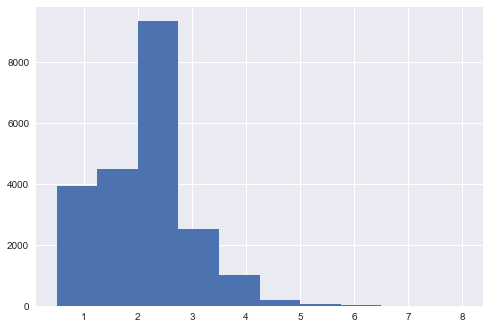

In [107]:
df.bathrooms.hist()

In [108]:
df.bathrooms.mean()

2.1158262721674306

In [109]:
df.bathrooms.median()

2.25

### Waterfront nans to zeros

In [110]:
df.waterfront = df.waterfront.fillna(0)

In [111]:
df.tail()

,bathrooms,sqft_living,waterfront,view,grade,sqft_basement,zipcode,lat,long,sqft_living15,log_price
21592,2.50,1530,0.0,0.0,8,0.0,98103,47.6993,-122.346,1530,12.793859
21593,2.50,2310,0.0,0.0,8,0.0,98146,47.5107,-122.362,1830,12.899220
21594,0.75,1020,0.0,0.0,7,0.0,98144,47.5944,-122.299,1020,12.904459
21595,2.50,1600,0.0,0.0,8,0.0,98027,47.5345,-122.069,1410,12.899220
21596,0.75,1020,0.0,0.0,7,0.0,98144,47.5941,-122.299,1020,12.691580


In [112]:
df.isna().sum()

bathrooms         0
sqft_living       0
waterfront        0
view             63
grade             0
sqft_basement     0
zipcode           0
lat               0
long              0
sqft_living15     0
log_price         0
dtype: int64

In [113]:
df.view.isna().index 

RangeIndex(start=0, stop=21597, step=1)

In [114]:
df = df.dropna().copy()

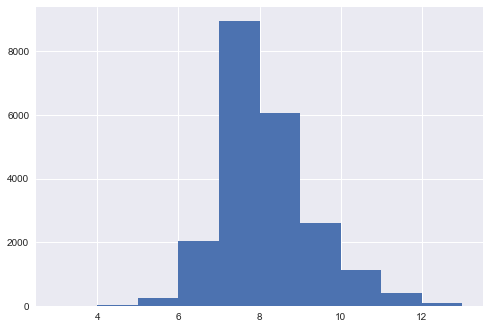

In [115]:
df.grade.hist()

In [116]:
df["log_grade"] = np.log(df.grade)

In [117]:
df.drop(["grade"], axis = 1, inplace = True )

In [118]:
sorted(df.sqft_basement.unique())

['0.0',
 '10.0',
 '100.0',
 '1000.0',
 '1008.0',
 '1010.0',
 '1020.0',
 '1024.0',
 '1030.0',
 '1040.0',
 '1050.0',
 '1060.0',
 '1070.0',
 '1080.0',
 '1090.0',
 '110.0',
 '1100.0',
 '1110.0',
 '1120.0',
 '1130.0',
 '1135.0',
 '1140.0',
 '1150.0',
 '1160.0',
 '1170.0',
 '1180.0',
 '1190.0',
 '120.0',
 '1200.0',
 '1210.0',
 '1220.0',
 '1230.0',
 '1240.0',
 '1245.0',
 '1248.0',
 '1250.0',
 '1260.0',
 '1270.0',
 '1275.0',
 '1280.0',
 '1281.0',
 '1284.0',
 '1290.0',
 '130.0',
 '1300.0',
 '1310.0',
 '1320.0',
 '1330.0',
 '1340.0',
 '1350.0',
 '1360.0',
 '1370.0',
 '1380.0',
 '1390.0',
 '140.0',
 '1400.0',
 '1410.0',
 '1420.0',
 '143.0',
 '1430.0',
 '1440.0',
 '145.0',
 '1450.0',
 '1460.0',
 '1470.0',
 '1480.0',
 '1481.0',
 '1490.0',
 '150.0',
 '1500.0',
 '1510.0',
 '1520.0',
 '1525.0',
 '1530.0',
 '1540.0',
 '1548.0',
 '1550.0',
 '1560.0',
 '1570.0',
 '1580.0',
 '1590.0',
 '160.0',
 '1600.0',
 '1610.0',
 '1620.0',
 '1630.0',
 '1640.0',
 '1650.0',
 '1660.0',
 '1670.0',
 '1680.0',
 '1690.0',
 '

In [119]:
df["sqft_basement"].replace("?", "0", inplace = True)

In [120]:
df.sqft_basement = df.sqft_basement.astype("float64")

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 11 columns):
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
waterfront       21534 non-null float64
view             21534 non-null float64
sqft_basement    21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
log_price        21534 non-null float64
log_grade        21534 non-null float64
dtypes: float64(8), int64(3)
memory usage: 2.0 MB


In [123]:
sorted(df.sqft_basement.unique())

[0.0,
 10.0,
 20.0,
 40.0,
 50.0,
 60.0,
 65.0,
 70.0,
 80.0,
 90.0,
 100.0,
 110.0,
 120.0,
 130.0,
 140.0,
 143.0,
 145.0,
 150.0,
 160.0,
 170.0,
 172.0,
 176.0,
 180.0,
 190.0,
 200.0,
 207.0,
 210.0,
 220.0,
 225.0,
 230.0,
 235.0,
 240.0,
 243.0,
 248.0,
 250.0,
 260.0,
 265.0,
 266.0,
 270.0,
 274.0,
 276.0,
 280.0,
 283.0,
 290.0,
 295.0,
 300.0,
 310.0,
 320.0,
 330.0,
 340.0,
 350.0,
 360.0,
 370.0,
 374.0,
 380.0,
 390.0,
 400.0,
 410.0,
 414.0,
 415.0,
 417.0,
 420.0,
 430.0,
 435.0,
 440.0,
 450.0,
 460.0,
 470.0,
 475.0,
 480.0,
 490.0,
 500.0,
 506.0,
 508.0,
 510.0,
 515.0,
 516.0,
 518.0,
 520.0,
 530.0,
 540.0,
 550.0,
 556.0,
 560.0,
 570.0,
 580.0,
 588.0,
 590.0,
 600.0,
 602.0,
 610.0,
 620.0,
 630.0,
 640.0,
 650.0,
 652.0,
 660.0,
 666.0,
 670.0,
 680.0,
 690.0,
 700.0,
 704.0,
 710.0,
 720.0,
 730.0,
 740.0,
 750.0,
 760.0,
 768.0,
 770.0,
 780.0,
 784.0,
 790.0,
 792.0,
 800.0,
 810.0,
 820.0,
 830.0,
 840.0,
 850.0,
 860.0,
 861.0,
 862.0,
 870.0,
 875.0,
 88